In [25]:
import pytesseract
from PIL import Image
from matplotlib import pyplot as plt
from pdf2image import convert_from_path
import cv2 as cv
import numpy as np
import re

In [7]:
import os
current_directory = os.getcwd()
current_directory

'/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Python/Project for practicing/Advance-Medical-transformation/Backend/resources/prescription'

In [8]:
path_pdf = '/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Python/codebasics_python_course_code/5_project_medical_data_extraction/backend/resources/prescription/pre_1.pdf'
image_path = '/Users/ricky/Downloads/DATA ANALYST BOOSTCAMP/Booscamp DATA/Python/codebasics_python_course_code/5_project_medical_data_extraction/backend/notebooks/dark_image.jpg'


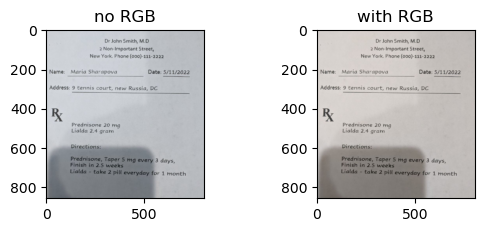

In [11]:
image = cv.imread(image_path)
image_RGB = cv.cvtColor(image, cv.COLOR_BGR2RGB)

images = [image, image_RGB]
titles = ['no RGB', 'with RGB']
for i in range(2):
    plt.subplot(2,2,i+1), plt.imshow(images[i])
    plt.title(titles[i])
    


In [12]:
#Conver pdf to string
image_pdf = convert_from_path(path_pdf,poppler_path='/usr/local/Cellar/poppler/24.04.0_1/bin')
# for page_num, page in enumerate(image_pdf):
#     text1 = pytesseract.image_to_string(page)
#     print(text1)

In [13]:
image_pdf

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200>]

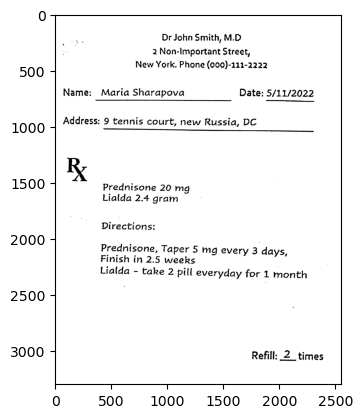

In [91]:
image_pil = image_pdf[0]
image_cv = np.array(image_pil)
image_rgb = cv.cvtColor(image_cv, cv.COLOR_BGR2GRAY)
resized = cv.resize(image_rgb, None, fx = 1.5, fy=1.5, interpolation = cv.INTER_LINEAR)
image_blur = cv.GaussianBlur(resized,(5,5),0)
# image_cv = cv.imread(image_from_pdf, cv.IMREAD_GRAYSCALE)
th = cv.adaptiveThreshold(image_blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                         cv.THRESH_BINARY,65,11)
plt.imshow(th, 'grey')

In [92]:
text2 = pytesseract.image_to_string(th)
print(text2)

Dr John Smith, M.D
2 Non-Ilmportant Street,
New York, Phone (000)-111-2222

Name: Marta Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

K

Prednisone 20 mg
Lialda 2.4 gram

Directions:
Prednisone, Taper 5 mg every 3 days,

Finish in 2.5 weeks ,
Lialda - take 2 pill everyday for 1 month

Refill: 2 times



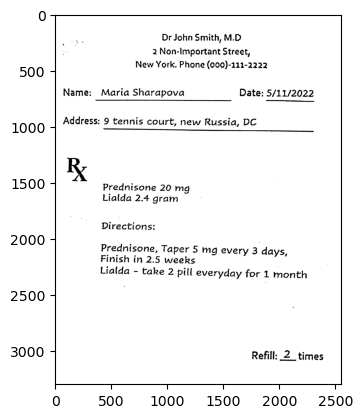

In [100]:
image_jpeg = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
th2 = cv.adaptiveThreshold(image_jpeg, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                         cv.THRESH_BINARY,65,15)
plt.imshow(th, 'grey')

In [101]:
text3 = pytesseract.image_to_string(th2)
print(text3)

Or John Smith, M.D
2 Non-Important Street,
New York. Phone (000)-112-2222

Name: Maria Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

K

Prednisone 20 mg
Liatda 2.4 gram

Directions:

Prednisone, Taper 5 mg every 3 days,
Finish in 2.5 weeks
Lialda - take 2 pill everyday for 1 month



In [24]:
print(text2)

Dr John Smith, M.D
2 Non-Important Street,
New York. Phone (000)-111-2222

Name: Maria Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

K

Prednisone 20 mg
Lialda 2.4 gram

Directions:
Prednisone, Taper 5 mg every 3 days,

Finish in 2.5 weeks
Lialda - take 2 pill everyday for 1 month

Refill: 2 times



In [57]:
pattern_name = '(Name:.*)Date'
name = re.search(pattern_name, text2)
name
name_patient = name.group(1).strip()
name_patient

'Name: Maria Sharapova'

In [71]:
pattern_address = '(Address:.*)'
address1 = re.search(pattern_address, text2)
address1
address = address1.group(1)
address

'Address: 9 tennis court, new Russia, DC'

In [85]:
pattern_decription = 'K.\n(.*)Directions'
description1 = re.search(pattern_decription, text2, re.DOTALL)
description = description1.group(1).strip()
print(description)

Prednisone 20 mg
Lialda 2.4 gram


In [96]:
pattern_utilise = 'Directions:\n(.*)Refill'
utilise1 = re.search(pattern_utilise, text2, re.DOTALL) 
utilise = utilise1.group(1).strip()
utilise = re.sub('\n+','\n',utilise)
print(utilise)

Prednisone, Taper 5 mg every 3 days,
Finish in 2.5 weeks ,
Lialda - take 2 pill everyday for 1 month
